In [10]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# Data Processing

In [11]:
# import the dataset
# Making a list of missing value types
missing_values = ["?", ""] # After check the csv files, we can find the missing values are ?.
df = pd.read_csv('breast-cancer-wisconsin.csv', na_values = missing_values) 
print(df.shape)
df.head(10)

(699, 11)


,Sample,F1,F2,F3,F4,F5,F6,F7,F8,F9,Class
0,1000025,5,1,1,1,2,1.0,3,1,1,2
1,1002945,5,4,4,5,7,10.0,3,2,1,2
2,1015425,3,1,1,1,2,2.0,3,1,1,2
3,1016277,6,8,8,1,3,4.0,3,7,1,2
4,1017023,4,1,1,3,2,1.0,3,1,1,2
5,1017122,8,10,10,8,7,10.0,9,7,1,4
6,1018099,1,1,1,1,2,10.0,3,1,1,2
7,1018561,2,1,2,1,2,1.0,3,1,1,2
8,1033078,2,1,1,1,2,1.0,1,1,5,2
9,1033078,4,2,1,1,2,1.0,2,1,1,2


In [12]:
# To find the total number of null values
df.isnull().sum()

Sample     0
F1         0
F2         0
F3         0
F4         0
F5         0
F6        16
F7         0
F8         0
F9         0
Class      0
dtype: int64

In [13]:
df.dropna(inplace = True)
df.head(10)

,Sample,F1,F2,F3,F4,F5,F6,F7,F8,F9,Class
0,1000025,5,1,1,1,2,1.0,3,1,1,2
1,1002945,5,4,4,5,7,10.0,3,2,1,2
2,1015425,3,1,1,1,2,2.0,3,1,1,2
3,1016277,6,8,8,1,3,4.0,3,7,1,2
4,1017023,4,1,1,3,2,1.0,3,1,1,2
5,1017122,8,10,10,8,7,10.0,9,7,1,4
6,1018099,1,1,1,1,2,10.0,3,1,1,2
7,1018561,2,1,2,1,2,1.0,3,1,1,2
8,1033078,2,1,1,1,2,1.0,1,1,5,2
9,1033078,4,2,1,1,2,1.0,2,1,1,2


In [14]:
# Replace factors' name
df.rename(columns={"F1" : "Clump Thickness", "F2" : "Uniformity of Cell Size", "F3" : "Uniformity of Cell Shape",
                     "F4" : "Marginal Adhesion", "F5" : "Single Epithelial Cell Size", "F6" : "Bare Nuclei", 
                     "F7" : "Bland Chromatin", "F8" : "Normal Nucleoli", "F9" : "Mitoses", "Class" : "Diagnosis Class"},inplace=True)
df.head()

,Sample,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Diagnosis Class
0,1000025,5,1,1,1,2,1.0,3,1,1,2
1,1002945,5,4,4,5,7,10.0,3,2,1,2
2,1015425,3,1,1,1,2,2.0,3,1,1,2
3,1016277,6,8,8,1,3,4.0,3,7,1,2
4,1017023,4,1,1,3,2,1.0,3,1,1,2


In [15]:
df.columns

Index(['Sample', 'Clump Thickness', 'Uniformity of Cell Size',
       'Uniformity of Cell Shape', 'Marginal Adhesion',
       'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin',
       'Normal Nucleoli', 'Mitoses', 'Diagnosis Class'],
      dtype='object')

In [16]:
from sklearn.model_selection import train_test_split
x=df[[ 'Clump Thickness', 'Uniformity of Cell Size',
       'Uniformity of Cell Shape', 'Marginal Adhesion',
       'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin',
       'Normal Nucleoli', 'Mitoses']]
y=df[['Diagnosis Class']]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)    # Use 30% test 70% training data. 

# 6.1
Use the C5.0 methodology to develop a classification model for the Diagnosis.


In [17]:
# import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

# Instantiate dt
dt =  DecisionTreeClassifier(criterion='entropy', max_depth=6, random_state=1)#C5.0 use criterion parameter as entropy.

# Fit dt to the training set
dt.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=6,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=1, splitter='best')

In [18]:
# Compute y_pred
y_pred = dt.predict(x_test)
print(y_pred[0:5])

[2 2 2 4 2]


In [20]:
from sklearn.metrics import accuracy_score

# Predict test set labels
y_pred = dt.predict(x_test)

# Compute test set accuracy  
acc = accuracy_score(y_test, y_pred)
print("Test set accuracy: {:.2f}".format(acc))

Test set accuracy: 0.96


[Text(306.90000000000003, 403.81714285714287, 'X[1] <= 2.5\nentropy = 0.934\nsamples = 478\nvalue = [311, 167]'),
 Text(111.60000000000001, 341.69142857142856, 'X[5] <= 3.5\nentropy = 0.181\nsamples = 293\nvalue = [285, 8]'),
 Text(55.800000000000004, 279.5657142857143, 'X[0] <= 7.5\nentropy = 0.035\nsamples = 276\nvalue = [275, 1]'),
 Text(27.900000000000002, 217.44, 'entropy = 0.0\nsamples = 274\nvalue = [274, 0]'),
 Text(83.7, 217.44, 'X[2] <= 2.5\nentropy = 1.0\nsamples = 2\nvalue = [1, 1]'),
 Text(55.800000000000004, 155.3142857142857, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(111.60000000000001, 155.3142857142857, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(167.4, 279.5657142857143, 'X[0] <= 3.5\nentropy = 0.977\nsamples = 17\nvalue = [10, 7]'),
 Text(139.5, 217.44, 'entropy = 0.0\nsamples = 9\nvalue = [9, 0]'),
 Text(195.3, 217.44, 'X[3] <= 8.0\nentropy = 0.544\nsamples = 8\nvalue = [1, 7]'),
 Text(167.4, 155.3142857142857, 'entropy = 0.0\nsamples = 7\nvalue 

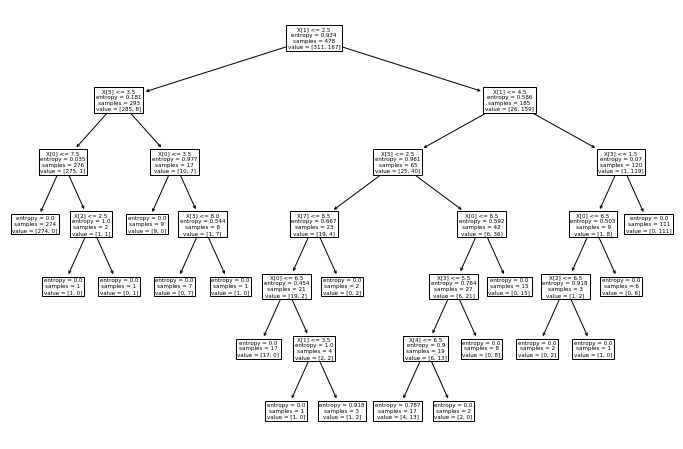

In [21]:
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(dt.fit(x_train, y_train)) 

# 6.2
Use the Random Forest methodology to develop a classification model for the Diagnosis and identify important features.

In [22]:
# import Random Forest classifier

from sklearn.ensemble import RandomForestClassifier

# Import accuracy_score

from sklearn.metrics import accuracy_score

# instantiate the classifier with n_estimators = 100

rfc_100 = RandomForestClassifier(n_estimators=100, random_state=0)


# fit the model to the training set

rfc_100.fit(x_train, y_train)


# Predict on the test set results

y_pred_100 = rfc_100.predict(x_test)


print(y_pred_100[0:5])

[2 2 2 4 2]


In [24]:
# Check accuracy score 

print('Model accuracy score of Random Forest: {0:0.4f}'. format(accuracy_score(y_test, y_pred_100)))

Model accuracy score of Random Forest: 0.9805
